# 決定木

In [56]:
import numpy as np
import pandas as pd

df = pd.read_csv('./products_dataset_cut5.csv')

In [57]:
df = df.drop('product_id', axis=1)
df = df.drop('product_category_name', axis=1)
df = df.dropna()
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold,decile
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527,1
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488,1
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484,1
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392,1
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388,1
...,...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1,5
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1,5
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1,5
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1,5


In [58]:
# カテゴリ変数はきいていなさそうなので、使わない
#df = pd.get_dummies(df, columns=['product_category_name'])

In [59]:
df['target'] = 0
for i, x in enumerate(df.decile):
    if x==1:
        df['target'][i] = 1 
    else:
        df['target'][i] = 0        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold,decile,target
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527,1,1
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488,1,1
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484,1,1
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392,1,1
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388,1,1
...,...,...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1,5,0
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1,5,0
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1,5,0
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1,5,0


In [61]:
#df = df.drop('decile', axis=1)
df = df.drop('count_sold', axis=1)


In [62]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X=df.drop('target', axis=1)
y = df['decile']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 学習データ:評価データ＝4:1

tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)  #決定木の学習, 木の深さ=3

print("train data's accuracy:", tree.score(X_train, y_train))
print("test data's accuracy: ", tree.score(X_test, y_test))

train data's accuracy: 1.0
test data's accuracy:  1.0


In [63]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    tree,
    X_train, 
    y_train,
    target_name = 'decile',
    feature_names = X_train.columns,
    class_names=['0', '1'] 
) 

display(viz)

Exception: class_names must be dict or sequence, not NoneType

In [10]:
len(y)

32340

# 回帰

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,-0.436931,0.207061,2.194339,0.075491,1.129145,-0.510330,0.562269
1,0.539104,-0.828972,-0.684586,-0.208906,1.129145,-0.510330,1.390181
2,0.734310,-0.666796,-0.108801,-0.169880,-0.050399,0.369700,0.562269
3,1.027121,-0.677818,-0.108801,-0.123143,0.362442,0.369700,1.390181
4,0.831914,-0.638455,-0.108801,-0.146512,-0.050399,0.369700,0.562269
...,...,...,...,...,...,...,...
32335,0.441500,0.584945,1.042769,-0.239987,0.834259,0.956386,-0.679600
32336,-1.412965,0.427494,-0.108801,-0.391883,-0.404262,0.076356,-0.017270
32337,0.246293,-0.205463,-0.684586,-0.415252,-0.640171,-0.363659,-0.845182
32338,0.148690,1.860305,-0.684586,-0.064721,-0.168353,0.149692,-0.182852


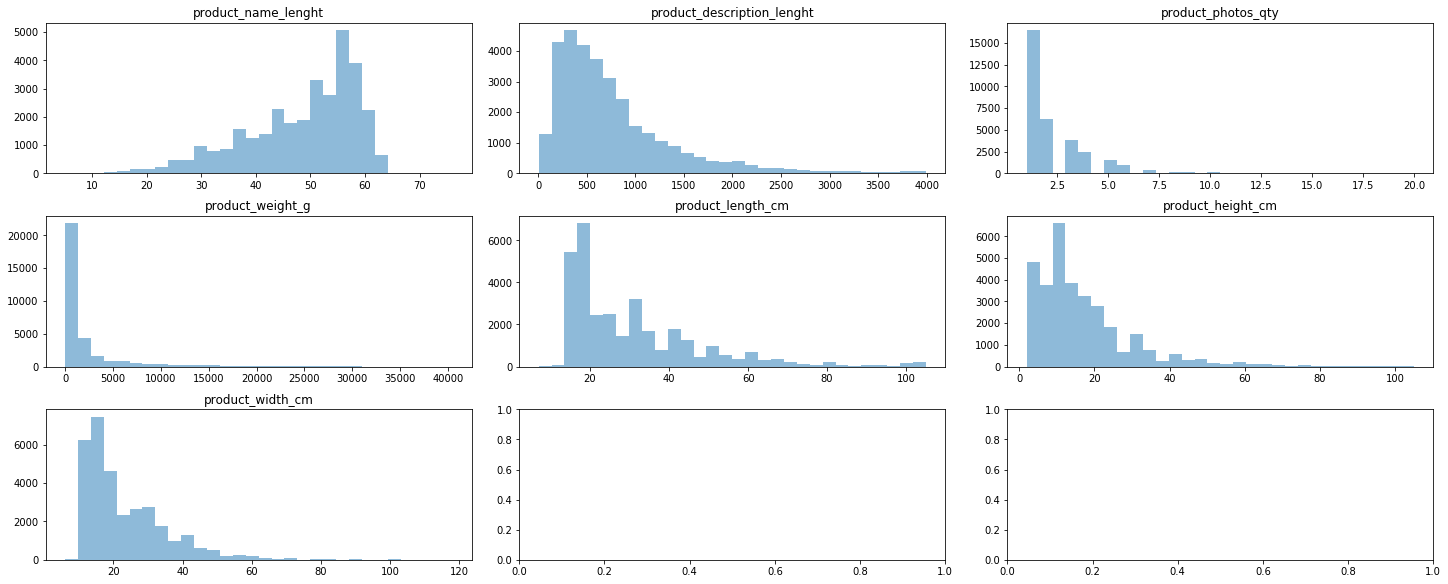

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

# 各変数の分布の可視化
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 8), constrained_layout=True)
for i, (c, v) in enumerate(X.iteritems()):
    a = ax[i//3, i%3]
    #a.hist(v[y == 0], label='0', bins=30, range=(v.min(), v.max()), alpha=0.5, color='tab:blue')
    a.hist(v[y == 1], label='1', bins=30, range=(v.min(), v.max()), alpha=0.5, color='tab:orange')
    a.set_title(c)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [47]:
model.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(model.coef_)
print(model.intercept_)
#print(model.score(X_scaled, y))

[ 1.86830088e-04  1.74907181e-05 -3.28106080e-05 -1.22304146e-04
 -1.32251737e-05 -2.60348663e-05  1.19818468e-04]
0.00040197897340754483
0.00012957026217785828


from sklearn.preprocessing import StandardScaler
import pandas as pd

X = cancer.data
y = cancer.target

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled